<h1 style="text-align: center;">[Capstone Project Module 3: Hotel Booking Demand Classification Model ]</h1>
<h3 style="text-align: center;">[Alief Dharmawan]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

"This data set contains booking information for a hotel located in Portugal, and includes information regarding room reservation for respective customers.
All personally identifying information has been removed from the data."

The data includes the following features:

`country`: Country of origin.

`market_segment`: Market segment designation. 

`previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking.

`booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

`deposit_type`: Indication on if the customer made a deposit to guarantee the booking. 

`days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer.

`customer_type`: Type of booking.

`reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

`required_car_parking_space`: Number of car parking spaces required by the customer.

`total_of_special_request`: Number of special requests made by the customer (e.g. twin bed or high floor).

`is_canceled`: Value indicating if the booking was canceled (1) or not (0).


The dataset contains booking information for a hotel in Portugal, including customer demographics, booking behaviors, and whether the reservation was canceled. Modern Hotels often struggle with last-minute cancellations, which cause revenue loss and operational inefficiencies. We want to try to use machine learning, to help the hotel anticipate cancellations to reduce revenue loss and operational efficiencies. 

**1.2 Stakeholders**

Primary Stakeholder: Reservations and Revenue Management Team

The team manages booking confirmations, overbooking strategies and inventory control. 
They can respond to cancellation risks by taking proactive measures such as following up to customers who are predicted to be at high risk of cancellations. We can also even offer them incentives so that they retend their confirmation. 

Secondary Stakeholders: Front Office and Operations, Marketing and CRM

Front Office and Operations will be able to handle room preparations and staffing based on predictions of cancelled rooms. 
Marketing and CRM can help the reservations team to come up with strategies in order to increase customer retention. 

**1.3 Problem Statements**

In the modern day of increasing adoption of technology, Hotels need to keep up with modern technology to compete and stay in business. One thing that every hotel needs to be aware of is the OTA, or Online Travel Agency, which is a third-party website or platform that allows travelers to book accommodations, flights, car rentals, and other travel services online. These platforms act as intermediaries, connecting hotels with potential guests and offering a convenient way to search, compare, and book travel arrangements. Using these comes with it's own problems. Some common Modern Hotel Problems include: 

Digital Convenience:
Guests want easy online booking, mobile check-in/check-out, and access to information via apps or websites. 
Relevant columns: Booking changes, Deposit type, Customer Type 

Competition:
The hospitality industry is highly competitive, requiring hotels to differentiate themselves and manage pricing effectively. 
Relevant columns: previous cancellations, market segment, booking changes, days in waiting list, customer type 

Lack of Guest Information:
Incomplete or inaccurate guest information from OTAs can lead to service issues. 
Relevant columns: Required car parking space, total of special request, reserved room type, days in waiting list 

Personalization:
Guests increasingly expect personalized experiences, including tailored recommendations, customized room preferences, and seamless digital interactions. 
Relevant columns: Total of special requests, required car parking space, reserved room type 

Cancellations are an important metric for hotels to keep in mind so that they can better plan out their strategy. All of this data is to keep track and predict hotel cancellation bookings. 

The hotel experiences a substantial number of last-minute booking cancellations, leading to:
- Lost revenue from unsold rooms.
- Operational inefficiencies in room allocation and staffing.
- Distorted demand forecasting and pricing decisions.

**Core Problem:**  
How can the hotel predict the likelihood of a booking being canceled early enough to take action? 


**1.4 Goals**

The goal is to build and deploy a machine learning model that predicts the probability of hotel booking cancellations with at least 80% recall and 75% F1-score on unseen data. By delivering the model and an accompanying insights report before the new quarter, the hotel can proactively manage overbooking, optimize resource allocation, and reduce cancellation-related revenue losses by an estimated 10%. This solution will be fully integrated into operational processes to support data-driven decision-making.

**1.5 Analytical Approach**

- **Problem Type:** Binary Classification (Canceled vs. Not Canceled).
- **Target Variable:** `is_canceled` (1 = canceled, 0 = not canceled).
- **Possible Model Uses:** KNN, Logistic Regression, AdaBoost, Decision Tree, Gradient Boosting, XGBoost, Random Forest, LightGBM.
- **Preprocessing Steps:**  
  - Identify missing values.  
  - Encode categorical features (`market_segment`, `deposit_type`, etc.).
  - Outlier Capping
  - Rare Category Grouping
  - Imputing 
  - Scaling 

**1.6 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

### Business Metric
- **Reduction in revenue loss from cancellations** - measured by comparing historical cancellation rates to projected rates after implementing the predictive model.
- **Operational efficiency gains** - e.g., reduced overstaffing or unused room inventory.

### Machine Learning Evaluation Metric
- **Primary Metric:** Recall on the "canceled" class - to maximize detection of likely cancellations.
- **Secondary Metrics:**  
  - F1-score - balance precision and recall.  
  - ROC AUC - assess overall classification performance.

Metric selection aligns with business priority: better to flag most high-risk bookings (higher recall) even at the cost of some false positives.

**1.7 Success Criteria**

### Business Success
- At least **X%** reduction in revenue loss from last-minute cancellations.  
- Improved room occupancy rates and staff scheduling efficiency.

### Machine Learning Success
- Recall ≥ **0.80** on test data.  
- F1-score ≥ **0.75** to maintain balanced performance.

## **Section 2. Data Understanding**

**2.1 General Information**


- **Dataset**: Hotel Booking Demand - booking records from a hotel in Portugal.
- **Shape**: 83,573 rows × 11 columns.
- **Data Types**:  
  - Numeric (5): `previous_cancellations`, `booking_changes`, `required_car_parking_spaces`, `total_of_special_requests`, `days_in_waiting_list`
  - Categorical (5): `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`, `country`
- **Target Variable**: `is_canceled` - 1 if booking canceled, 0 otherwise.

###  Library Imports

In [1]:
# Data Manipulation Library Imports

import pandas as pd
import numpy as np

In [2]:
# Data Visualization Library Imports


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Machine Learning Library Imports


# Feature Engineering Library Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection Library Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer, average_precision_score


from sklearn.base import clone
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict


In [4]:
# Other Library Imports

#for seeding and reproducibility
import random 

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [ ]:
#Load Dataset
df = pd.read_csv(r"C:\Users\Alief\Downloads\Purwadhika Data Science Program\Module 3 Machine Learning\Capstone Project Module 3\MachineLearningProject\data\raw\data_hotel_booking_demand_original.csv")
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [6]:
#Checking the memory the dataset uses
mem_usage_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Dataset uses approximately {mem_usage_mb:.2f} MB of memory")


Dataset uses approximately 25.99 MB of memory


In [7]:
# Reproducibility - For our machine learning models ahead, we will set the random seed to 42. Random state will be set to SEED from now on. 
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

**2.2 Feature Information**


| Feature | Description | Impact to Business |
|---------|-------------|--------------------|
| country | Country of origin. | We want to see if there are any geographic patterns in cancellations. |
| market_segment | Market segment designation. | Helps target marketing efforts and adjust offerings based on booking source. |
| previous_cancellations | Number of previous bookings canceled by the customer prior to the current booking. | This measures customer reliability; high values may predict future cancellations. |
| booking_changes | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. | Frequent changes may indicate uncertainty and higher cancellation risk. |
| deposit_type | Indication on if the customer made a deposit to guarantee the booking. | A deposit will probably reduce chances of cancellations but also impacts pricing and refund policy. |
| days_in_waiting_list | Number of days the booking was in the waiting list before it was confirmed to the customer. | Long waits might increase cancellation likelihood; affects booking management team. |
| customer_type | Type of booking. | Different customer types may have distinct booking behaviors and cancellation rates. |
| reserved_room_type | Code of room type reserved. Code is presented instead of designation for anonymity reasons. | Mismatch between reserved and assigned room can lead to customer dissatisfaction which affects customer experience. Relevant for CRM team |
| required_car_parking_space | Number of car parking spaces required by the customer. | This impacts facility planning and the operations team. |
| total_of_special_request | Number of special requests made by the customer (e.g. twin bed or high floor). | This may correlate with satisfaction or cancellations. |
| is_canceled | Value indicating if the booking was canceled (1) or not (0). | Target variable; directly measures booking success vs. loss. |


**2.3 Statistics Summary**

In [8]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


We see that most customers actually have low numbers in several numeric categories. When it comes to previous cancellations, booking changes, days in waiting list and special requests, most customers (over 75% of them) either have 0 or 1 in these categories. This means most likely we will see a lot of outliers for a small percentage of customers. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [10]:
df.nunique()

country                        162
market_segment                   8
previous_cancellations          15
booking_changes                 19
deposit_type                     3
days_in_waiting_list           115
customer_type                    4
reserved_room_type              10
required_car_parking_spaces      5
total_of_special_requests        6
is_canceled                      2
dtype: int64

The number of unique values in each column also tells us that out of 80,000+ customers, besides country and waiting time, there is not much variance in different types of characteristics a booking has. 

In [11]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Note: Each row represents a unique hotel booking record (anonymized), including customer characteristics, booking details, and whether the booking was canceled (is_canceled)

## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [12]:
# Checking missing values 
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[GNB, JEY]"
1,market_segment,object,0,0.00,8,"[Offline TA/TO, Direct]"
2,previous_cancellations,int64,0,0.00,15,"[1, 11]"
3,booking_changes,int64,0,0.00,19,"[12, 1]"
4,deposit_type,object,0,0.00,3,"[Refundable, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[56, 48]"
6,customer_type,object,0,0.00,4,"[Transient, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[A, F]"
8,required_car_parking_spaces,int64,0,0.00,5,"[8, 0]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 2]"


Imputing missing values will create a data leakage if I impute using mode before splitting. Therefore we will just note that I have decided to impute using the mode and continue on with the rest of the data cleaning first. 
Also important to re consider whether country is a valid feature to include. Will it cause unneccessary discrimination because of nationality?

**3.2 Duplicated Values**

In [13]:
# Count duplicates
dup_cnt = df.duplicated().sum()
print(f"Duplicate rows: {dup_cnt}")
# (No action yet—just measuring. If >0, we’ll decide later whether to drop.)

Duplicate rows: 73371


High apparent duplicates were detected, but due to the absence of a unique booking identifier, these likely represent legitimate separate bookings. Therefore, no duplicate removal will be performed.

**3.3 Identify Anomaly Values**
- Checking Feature Distribution of both Numerical and Categorical Variables
- For our numerical variables, most of them have small integer ranges  and are count based. The only columns that are noteworthy to check for distribution is days in waiting list and previous cancellations. 
- For our categorical variables, it is still useful to check the distributions for most. 

In [14]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


This is repeated to reiterate the outliers. Being in a waiting list for over a year for example, having unreasonable amounts of booking changes and previous cancellations. In terms of required car parking spots or total of special requests, I think the extresm of 8 parking spots and 5 special requests are still reasonable. 

In [16]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

We want to assess the variety of values in each column to detect potential issues (e.g., invalid categories, unusual codes) and to guide later feature encoding.

In [17]:
# Count unique values for numeric columns
nunique_numeric = df[numeric_cols].nunique().reset_index()
nunique_numeric.columns = ['Feature', 'Unique Values']
nunique_numeric

,Feature,Unique Values
0,previous_cancellations,15
1,booking_changes,19
2,days_in_waiting_list,115
3,required_car_parking_spaces,5
4,total_of_special_requests,6
5,is_canceled,2


In [18]:
invalid_counts = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        invalid_counts[col] = int((df[col] < 0).sum())
invalid_counts if invalid_counts else "No negative values found in numeric columns."


'No negative values found in numeric columns.'

We can use unique values for numeric columns as all of them are integers. This is also another way to check the distribution. 

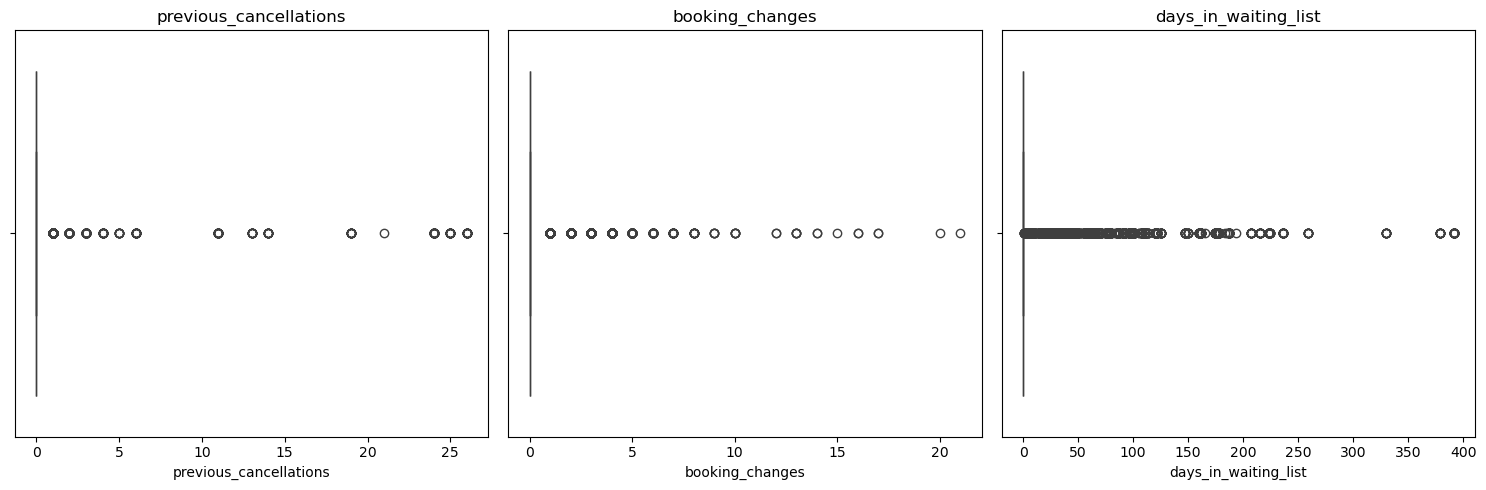

In [19]:
numeric_cols_to_plot1 = numeric_cols[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


Review numeric feature distributions to detect skewness, extreme values, and anomalies that may require transformation or capping to improve model performance.

From the box and whisker plot we see that there are many outliers in each column. Each circle here represents outliers outside of the Inter Quartile Range that the plot measures. 

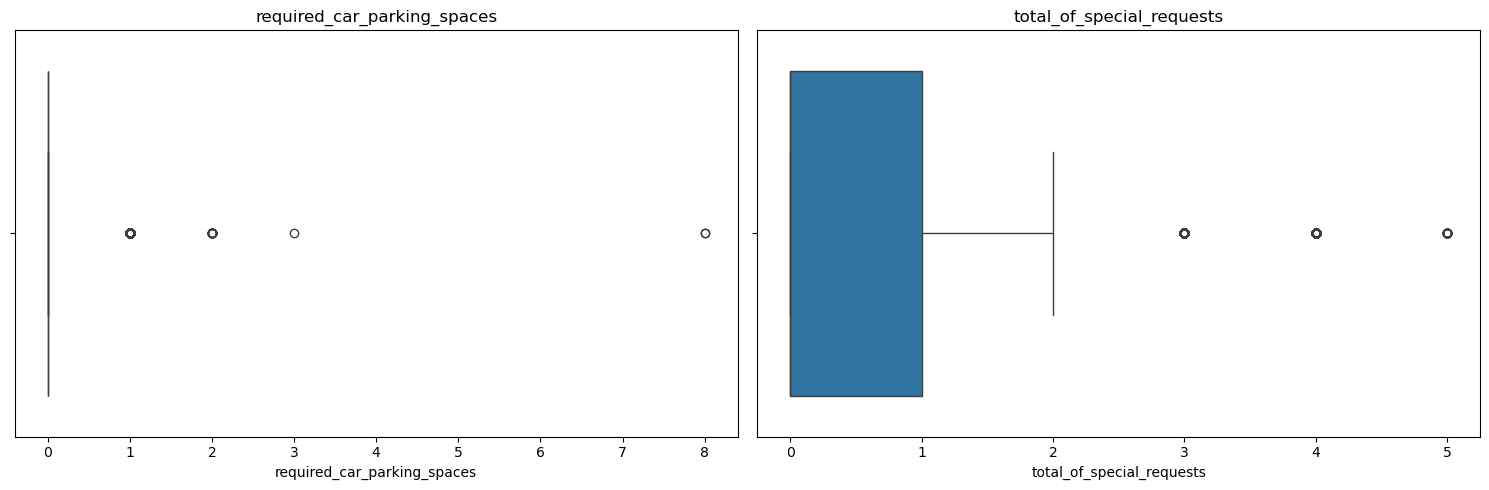

In [20]:
numeric_cols_to_plot2 = numeric_cols[-3:]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Again, We can see that most of the numeric columns actually have a lot of outliers. Only for the whisker plot of total special requests do we actually see the IQR box.

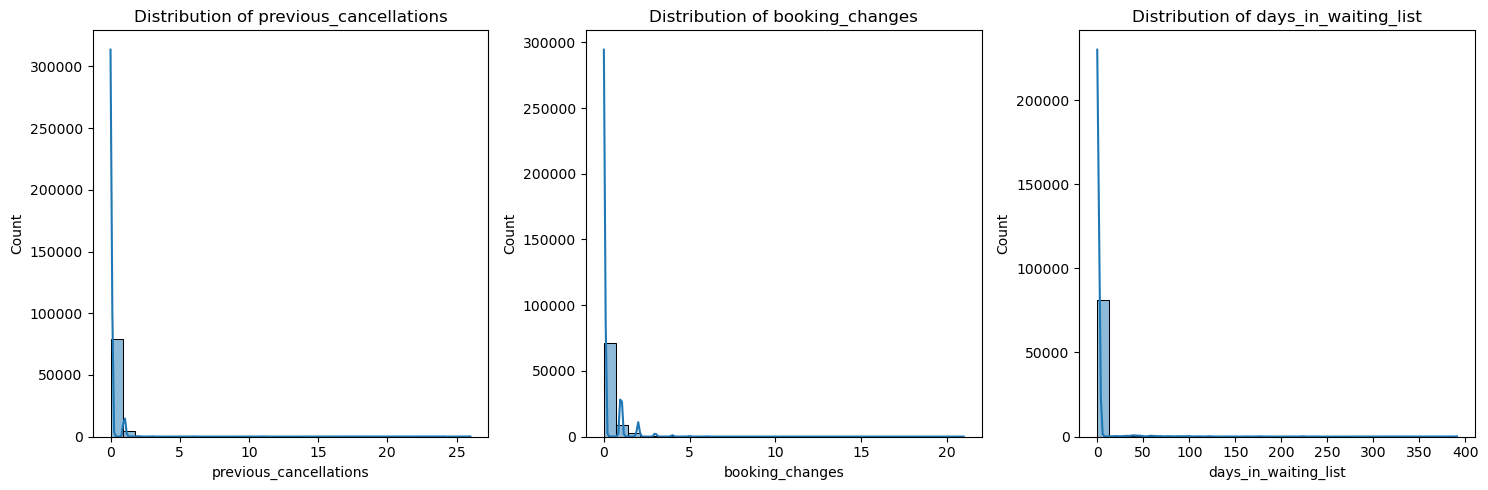

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

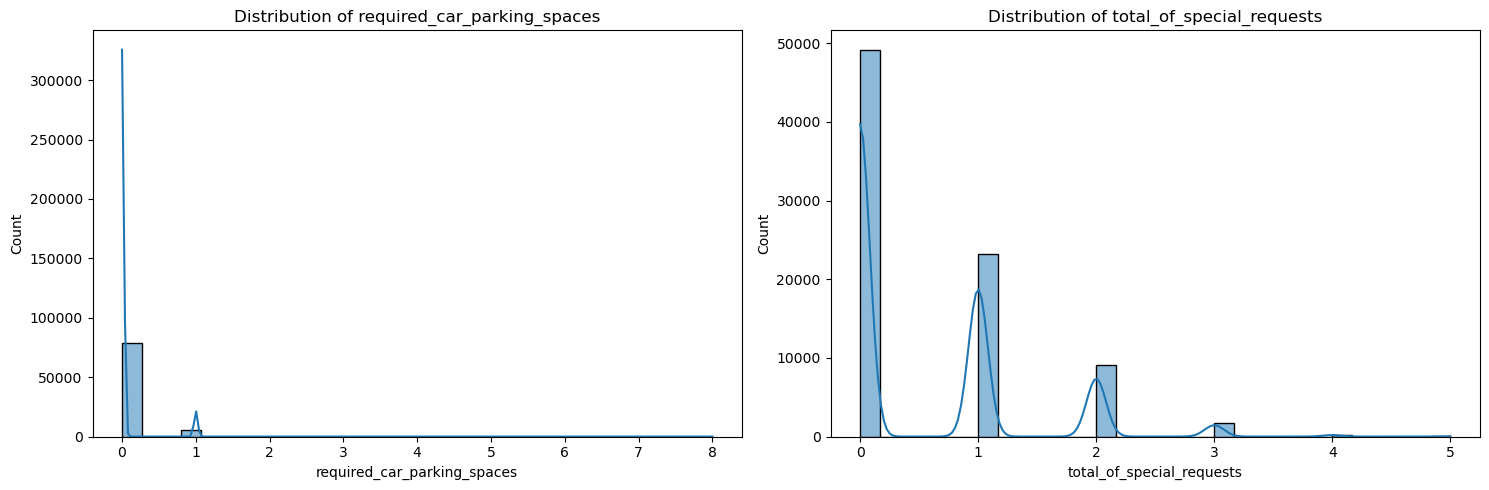

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [23]:
# show outliers for numerical column 
lower = []
upper = []
lower_count = []
upper_count = []
outlier_proportion = []

for column in numeric_cols:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * IQR
    upper_bound = df[column].quantile(0.75) + 1.5 * IQR

    lower.append(lower_bound)
    upper.append(upper_bound)
    lower_count.append(len(df[df[column] < lower_bound]))
    upper_count.append(len(df[df[column] > upper_bound]))
    outlier_proportion.append(
        round((len(df[df[column] < lower_bound]) + len(df[df[column] > upper_bound])) / len(df) * 100, 2)
    )

outliers = pd.DataFrame({
    "Numeric Columns": numeric_cols,
    "Lower Bound": lower,
    "Upper Bound": upper,
    "# Lower": lower_count,
    "# Upper": upper_count,
    "% Outlier": outlier_proportion
})

outliers

,Numeric Columns,Lower Bound,Upper Bound,# Lower,# Upper,% Outlier
0,previous_cancellations,0.0,0.0,0,4513,5.40
1,booking_changes,0.0,0.0,0,12700,15.20
2,days_in_waiting_list,0.0,0.0,0,2585,3.09
3,required_car_parking_spaces,0.0,0.0,0,5227,6.25
4,total_of_special_requests,-1.5,2.5,0,2051,2.45
5,is_canceled,-1.5,2.5,0,0,0.00


In the chart above, we want to show how much of the data in these columns are being counted as outliers. For example, booking changes having over 15% data that falls in the outlier group is significant. When we start pre processing the data this has to be addressed somehow. 

We also want to review categorical feature distributions to detect imbalance, dominant categories, and rare labels that may require grouping before encoding.

In [24]:
# Count unique values for categorical columns
nunique_categorical = df[categorical_cols].nunique().reset_index()
nunique_categorical.columns = ['Feature', 'Unique Values']
nunique_categorical

,Feature,Unique Values
0,country,162
1,market_segment,8
2,deposit_type,3
3,customer_type,4
4,reserved_room_type,10


Again, we see another case of where it might be beneficial to drop country as a feature. High Cardinality, which means that it has contains so much possible values making it difficult for the model to determine noise

In [25]:
# Create an empty list to store summaries
all_cat_summary = []

for col in categorical_cols:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True).mul(100).round(2)
    summary_df = pd.DataFrame({
        'Column': col,
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percents.values
    }).sort_values(by='Percentage', ascending=False)  # sort within column
    summary_df = summary_df.head(10)  # limit to top 10 per column
    all_cat_summary.append(summary_df)

# Combine all into one DataFrame
categorical_summary_df = pd.concat(all_cat_summary, ignore_index=True)

categorical_summary_df


,Column,Category,Count,Percentage
0,country,PRT,34097,40.97
1,country,GBR,8495,10.21
2,country,FRA,7307,8.78
3,country,ESP,5996,7.20
4,country,DEU,5116,6.15
5,country,ITA,2658,3.19
6,country,IRL,2340,2.81
7,country,BEL,1648,1.98
8,country,BRA,1553,1.87
9,country,USA,1472,1.77


Certain categories dominate in some features (e.g., Online TA in market_segment), while others appear very rarely. Will assess rare category handling in later cleaning steps.

Important to note that we see in the market segment feature of one row being 'Undefined'. Since it's only one value, it's not that significant to change or anything. We will just leave it as is. 


Summary: Categorical profiling complete. Several columns show strong category dominance, and some categories occur very rarely. These findings will inform encoding strategy and possible category grouping during Data Cleaning.

After going through the raw data there is an important decision to make regarding of one of the features. 

For feature country there are many considerations to dropping it. 

- High cardinality - country has lots of distinct values.

- One-hot encoding would produce many columns, making the dataset sparse and possibly slowing down training.

- Potentially low predictive power - If cancellation behavior doesn’t strongly depend on the customer’s country, it might add noise rather than signal. Some countries just have either 0% cancellation rate or 100% cancellation rate which will affect the model. 

- Small sample sizes per category - Countries with very few bookings don’t provide stable patterns for the model to learn from.

- Class imbalance within the feature - One country (e.g., PRT for Portugal) might dominate the data, making the rest negligible.

At this point we will just keep the country as a feature though. 



## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

To ensure a realistic evaluation of model performance, the dataset is split into Seen (used for model training and cross-validation) and Unseen (held-out final test) sets. The Seen data enables iterative model development and tuning, while the Unseen data simulates new, never-before-seen bookings, providing an unbiased measure of generalization. This approach mirrors real-world deployment, where the model will encounter future bookings not present during training, and prevents information leakage that could inflate performance metrics. Typically, you would use a time-based split, however in the case of our data, none of our columns actually provide data on timing. Therefore, we just make an arbitrary split of 80% Seen data and 20%  Unseen data.

In [26]:
# Defining Features & target
TARGET = 'is_canceled'

# Defining X and y
X = df.drop(columns=TARGET)
y = df[TARGET]
print(f"Features shape: {X.shape}")
print(f"Target shape  : {y.shape}")
# Displaying columns and target

Features shape: (83573, 10)
Target shape  : (83573,)


**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

To train and evaluate the model effectively, the Seen dataset is split into training and testing subsets. The training set is used for model fitting and cross-validation, while the testing set acts as a held-out portion to assess performance before the final Unseen evaluation. A stratified split is applied to preserve the original target distribution (cancellation rate ≈ 36.8%) across both subsets, ensuring class balance and preventing biased evaluation. Using a fixed random seed ensures reproducibility of the split for consistent results across runs.

In [27]:
# Create Seen (train) and Unseen (final holdout) data splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% Unseen holdout
    stratify=y,           # preserve target proportion
    random_state=SEED     # use reproducibility variable
)

print(f"Seen (train) set: {X_train.shape}, {y_train.shape}")
print(f"Unseen (test) set: {X_test.shape}, {y_test.shape}")

Seen (train) set: (66858, 10), (66858,)
Unseen (test) set: (16715, 10), (16715,)


In [28]:
# Check target distribution and sizes in both splits
train_cancel_rate = y_train.mean()
test_cancel_rate  = y_test.mean()

print(f"Train cancellation rate: {train_cancel_rate:.2%} ({y_train.sum()} / {len(y_train)})")
print(f"Test  cancellation rate: {test_cancel_rate:.2%} ({y_test.sum()} / {len(y_test)})")
print("-" * 50)
print(f"Train size: {X_train.shape[0]} rows, Test size: {X_test.shape[0]} rows")

Train cancellation rate: 36.83% (24622 / 66858)
Test  cancellation rate: 36.83% (6156 / 16715)
--------------------------------------------------
Train size: 66858 rows, Test size: 16715 rows


While our target classes are not perfectly balanced (≈ 63% non-canceled vs. ≈ 37% canceled), this distribution is not considered severely imbalanced in most machine learning contexts. Class imbalance typically becomes a major concern when the minority class falls below ~10–20% of the dataset, as this can bias models toward predicting the majority class and lead to poor minority-class recall. In our case, the minority class still represents more than one-third of the data, providing sufficient representation for both training and evaluation without requiring techniques such as oversampling, undersampling, or synthetic data generation. That said, performance metrics sensitive to imbalance (e.g., recall, F1-score, ROC-AUC) are still prioritized to ensure the model performs well for the minority (canceled) class.

In [ ]:
# Display unique values for each column in X_train
for col in X_train.columns:
    unique_values = X_train[col].unique()
    print(f"{col}:")
    print(", ".join(map(str, unique_values)))
    print("\n")

country:
['PRT' 'BEL' 'FIN' 'ARE' 'FRA' 'DEU' 'AGO' 'ESP' 'CN' 'SWE' 'GBR' 'BRA'
 'PRI' 'VEN' 'USA' 'ARG' 'IRL' 'NOR' 'CYP' 'IND' 'CHE' 'NGA' 'MAR' 'HKG'
 'TUR' 'AUS' 'ITA' 'LBN' 'NLD' nan 'POL' 'ECU' 'CHN' 'ROU' 'THA' 'AUT'
 'ISR' 'VNM' 'CZE' 'EST' 'BGR' 'ISL' 'ZAF' 'DNK' 'GRC' 'SVN' 'RUS' 'UKR'
 'LUX' 'IDN' 'CUB' 'URY' 'COL' 'LVA' 'PHL' 'JPN' 'DZA' 'SGP' 'HUN' 'DMA'
 'SAU' 'IRN' 'HRV' 'PER' 'CHL' 'PAK' 'JOR' 'MEX' 'TUN' 'BEN' 'MOZ' 'BLR'
 'AZE' 'CRI' 'KOR' 'TMP' 'LTU' 'ETH' 'EGY' 'NZL' 'UZB' 'GNB' 'SVK' 'MLT'
 'SRB' 'MAC' 'MKD' 'BDI' 'TWN' 'KAZ' 'ALB' 'LBY' 'KNA' 'OMN' 'LIE' 'CPV'
 'MDV' 'CIV' 'GIB' 'MYS' 'ABW' 'MUS' 'BIH' 'GGY' 'SEN' 'KHM' 'AND' 'BHR'
 'KWT' 'SUR' 'QAT' 'GHA' 'PRY' 'ARM' 'IRQ' 'FRO' 'DOM' 'PAN' 'GEO' 'UGA'
 'LKA' 'SYR' 'MMR' 'CAF' 'ZMB' 'BOL' 'CMR' 'BGD' 'JEY' 'GAB' 'MWI' 'KIR'
 'LCA' 'MLI' 'TJK' 'SYC' 'PLW' 'BRB' 'JAM' 'TZA' 'AIA' 'RWA' 'ZWE' 'BWA'
 'GLP' 'MNE' 'LAO' 'IMN' 'UMI' 'GTM' 'CYM' 'KEN' 'TGO' 'VGB' 'COM' 'MYT'
 'BFA']

market_segment:
['Offline TA/TO' 'On

Explanation of column values: 

Offline TA/TO – Bookings made through offline travel agents (TA) or tour operators (TO), often involving package deals or negotiated contracts, typically handled over phone, email, or in person.

Online TA – Bookings made via online travel agencies such as Booking.com, Expedia, Agoda, etc. These are usually instant online reservations without direct contact with the hotel.

Groups – Reservations made for large groups, such as corporate events, tour groups, or conferences. Often arranged under a group booking contract with special rates.

Complementary – Bookings where no payment is made by the guest, typically free stays offered for promotional purposes, staff use, or as part of a service exchange.

Direct – Guests book directly with the hotel, either via the hotel’s website, phone, email, or walk-in. Direct bookings often result in higher profit margins for the hotel.

Corporate – Bookings made by companies for employees traveling for business, often under a negotiated corporate rate agreement.

Aviation – Bookings from airline crews or passengers, often due to airline–hotel contracts for layovers or unexpected flight cancellations.

**4.3 Cross-Validation Strategy (for all model selection/tuning)**

In [30]:
# 5-fold CV, stratified, shuffled, reproducible
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=SEED
)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

To ensure robust model selection and tuning, we use Stratified K-Fold Cross-Validation with 5 folds. Stratification preserves the target class distribution (canceled vs. non-canceled) across all folds, ensuring that each fold is representative of the overall dataset. Shuffling before splitting prevents order bias that might arise from patterns in the dataset, and setting a fixed random seed guarantees reproducibility of results. This approach maximizes the use of available data for both training and validation, helping to produce performance estimates that generalize well to unseen data.

## **Section 5. Data Preparation**

**5.1 Feature Initialization & Guardrails**

In [ ]:
# --- Target & guardrails ---
TARGET = "is_canceled"
LEAKAGE_COLS = []  # added known leaks here if any are identified later

# --- Feature lists from X_train ---
features_all = [c for c in X_train.columns if c not in LEAKAGE_COLS]
features_num = X_train[features_all].select_dtypes(include=["number"]).columns.tolist()
features_cat = [c for c in features_all if c not in features_num]

print("Counts - numeric:", len(features_num), "| categorical:", len(features_cat))

Counts - numeric: 5 | categorical: 5


To prepare the dataset for modeling, we first define the target variable (is_canceled) and identify any leakage columns that could inadvertently give the model access to future information, leading to overly optimistic results. We then separate the remaining features into numeric and categorical lists, which ensures that each data type receives the correct preprocessing steps later in the pipeline (e.g., scaling for numeric variables, encoding for categorical variables). This structured initialization acts as a guardrail, preventing accidental inclusion of inappropriate features and enabling a clean, reproducible preprocessing workflow.

**5.2 Preprocessing Plan**

Goal: create a single, leak-safe preprocessing pipeline that can be fit only on the Seen/train folds during cross-validation and reused unchanged for final evaluation and deployment.

Overall design: two parallel pipelines—one for numeric features, one for categorical—combined with a ColumnTransformer and executed inside the modeling pipeline.

**5.3 Rare-category grouping helper**

Rare Category Grouping – Consolidating Infrequent Categories

Many categorical variables in the dataset contain **low-frequency categories** that appear in only a small proportion of rows. While these rare values may be valid, they can introduce several challenges during model training and deployment.

Rationale for Grouping Rare Categories
1. **Model Stability**  
   Very rare categories can lead to unstable parameter estimates in statistical models and overly specific splits in tree-based models, reducing generalizability.

2. **Dimensionality Reduction**  
   One-hot encoding rare categories produces sparse dummy variables with very few positive cases, increasing feature space without meaningful signal.

3. **Handling Future Unseen Values**  
   Grouping infrequent categories into a single label provides a consistent strategy for managing truly unseen categories during inference.

4. **Noise Reduction**  
   Low-frequency categories are often driven by outlier cases or data entry inconsistencies, which can introduce noise rather than meaningful patterns.

---

Method Used
- Implemented a custom **RareCategoryGrouper** transformer using scikit-learn’s `BaseEstimator` and `TransformerMixin`.
- For each categorical column:
  - Calculate the relative frequency of each category.
  - Retain only categories whose proportion is **≥ `min_freq`** (default: 1% of the Seen data).
  - Replace all other categories with a single label (`__OTHER__` by default).
- This transformation is **fit only on the Seen/training folds** during cross-validation to avoid target leakage, and then applied consistently to validation/test data.

---

Columns Subject to Grouping
- All categorical variables identified in the preprocessing step (`features_cat`).

---

**Note:**  
By grouping rare categories before one-hot encoding, we reduce the risk of generating large numbers of uninformative dummy variables, improve model stability, and ensure that the preprocessing pipeline is robust to new/unseen categories at prediction time.


In [32]:
# --- Rare category grouper ---

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, min_freq=0.01, other_label="__OTHER__"):
        """
        min_freq: Minimum frequency threshold (proportion of total rows) for a category to be kept.
                  Categories below this threshold are replaced with `other_label`.
        other_label: Label used for rare categories.
        """
        self.min_freq = min_freq             # store chosen frequency threshold
        self.other_label = other_label       # store label name for rare categories
        self.maps_ = {}                      # will store set of allowed categories per column
        self.columns_ = []                   # will remember column names during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column names

        n = len(X)                           # number of rows (for proportion calculation)
        for col in self.columns_:
            freq = X[col].value_counts(dropna=False) / n  # relative frequencies
            keep = freq[freq >= self.min_freq].index      # categories meeting threshold
            self.maps_[col] = set(map(str, keep))         # store as strings for consistency
        return self

    def transform(self, X):
        # defensive copy to avoid modifying caller's data
        X = pd.DataFrame(X).copy()
        X.columns = self.columns_  # restore original column names

        for col in self.columns_:
            # cast to string and replace values not in keep set with other_label
            X[col] = X[col].astype(str).where(
                X[col].astype(str).isin(self.maps_[col]),
                self.other_label
            )
        return X

**5.4 Outlier capping (IQR winsorization) for numeric features**

Outlier Handling – Capping Extreme Values

After examining the numeric columns, no negative or physically impossible values were found. However, certain variables showed extremely high values on the far right of their distribution, which could represent rare business cases or anomalies that might disproportionately influence the model.

Rationale for Capping
1. **Model Robustness**  
   Extreme values can distort the learning process in scale-sensitive algorithms (e.g., linear models, k-NN) and can affect stability in tree-based models when splits are influenced by rare extremes.

2. **Business Relevance**  
   Extremely large values (e.g., unusually high booking changes or long waiting list durations) occur rarely and may not represent typical customer patterns.

3. **Data Consistency**  
   Capping prevents extreme cases from overly influencing the model while maintaining the feature’s original range for the majority of records.

4. **Avoid Data Loss**  
   Instead of dropping rows, capping preserves all observations while limiting the impact of outliers.

---

Method Used
- Applied a custom **IQR-based transformer** (`IQRCapper`) implemented using scikit-learn’s `BaseEstimator` and `TransformerMixin`.
- For each numeric column:
  - Calculate the first quartile (**Q1**) and third quartile (**Q3**).
  - Compute the **interquartile range (IQR = Q3 − Q1)**.
  - Define caps using **Tukey’s fences**:
    - Lower bound = Q1 − (factor × IQR)  
    - Upper bound = Q3 + (factor × IQR)  
    - Default factor = **1.5** (standard for moderate outlier detection).
  - Clip values below/above these bounds to the caps.

---

Columns Subject to Capping
- All numeric features in the dataset at the time of preprocessing.

---

**Note:**  
This method balances **statistical best practices** with **business context**, ensuring that outlier handling is reproducible within the model pipeline and applied consistently during cross-validation and deployment.


In [33]:
# --- IQR Capping Transformer ---

class IQRCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        """
        factor: Tukey fence multiplier. 1.5 is standard; larger values = looser capping.
        """
        self.factor = factor                 # store the chosen IQR multiplier
        self.bounds_ = {}                    # will hold per-column (low, high) caps
        self.columns_ = []                   # will record column names seen during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure a DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column order/names

        # compute caps for each numeric column using Tukey's fences
        for col in self.columns_:
            q1 = X[col].quantile(0.25)       # first quartile (25th percentile)
            q3 = X[col].quantile(0.75)       # third quartile (75th percentile)
            iqr = q3 - q1                    # interquartile range
            lo = q1 - self.factor * iqr      # lower cap
            hi = q3 + self.factor * iqr      # upper cap
            self.bounds_[col] = (lo, hi)     # store caps for this column

        return self                          # scikit-learn convention: return self

    def transform(self, X):
        # make a defensive copy so we don't mutate caller's data
        X = pd.DataFrame(X).copy()

        # restore original column names (important inside ColumnTransformer)
        X.columns = self.columns_

        # apply clipping per column based on fitted caps
        for col, (lo, hi) in self.bounds_.items():
            X[col] = X[col].clip(lower=lo, upper=hi)

        return X                              # return transformed DataFrame


Variance Threshold – Removing Constant Features

**Purpose:**  
Eliminate features with no variability (constant columns) that carry no predictive information.

**Why it’s here:**  
Constant columns can appear after preprocessing steps such as one-hot encoding or rare category grouping. These features provide no value to the model and can be safely removed to simplify the feature space.

**Why `threshold=0.0`:**  
A threshold of `0.0` removes only **truly constant** columns (zero variance).  
Using a higher threshold could also remove features with small but non-zero variance, which may still contain useful signal.


In [ ]:
var_thresh = VarianceThreshold(threshold=0.0)

**5.5 Encoders, imputers, and scalers**

Preprocessing Pipeline Overview

Numeric Pipeline (`features_num`)
1. **Impute (median)** – fills missing values in a way that is robust to skew and outliers.  
2. **Outlier capping (`IQRCapper`, 1.5×IQR)** – caps extreme values to reduce the influence of heavy tails while preserving rank and order.  
3. **Scale (`StandardScaler`)** – centers and scales features so that linear and distance-based models behave well.  
4. **Variance filter (`VarianceThreshold=0`)** – removes constant/all-identical columns after imputation and capping.

**Why this order?**  
*Impute → Cap → Scale* ensures that we avoid scaling NaNs or unbounded extremes, and the variance check runs last so it reflects the post-imputation values.

Since our pipeline already includes IQR capping before scaling, we already reduced the influence of extreme outliers. This means StandardScaler is generally safe in our current setup, because the heavy tails are clipped before scaling.

---

Categorical Pipeline (`features_cat`)
1. **Impute (most_frequent)** – replaces missing categories with the most common category (mode).  
2. **Rare category grouping (`min_freq=0.01`)** – collapses infrequent labels into `"Other"` to stabilize one-hot encoding and reduce noise.  
3. **One-hot encode (`handle_unknown='ignore', drop='if_binary'`)** – creates model-friendly indicator variables and auto-treats true binaries as single columns.  
4. **Variance filter (`VarianceThreshold=0`)** – removes empty or single-level dummies that can arise after grouping.

**Why this order?**  
*Impute before grouping* ensures missing values are not treated as separate rare categories. *Group before encoding* to avoid unnecessarily large sparse matrices from one-hot encoding rare labels.

---

Column Combination & Leakage Control
- A **`ColumnTransformer`** applies the numeric and categorical pipelines to their respective feature lists, dropping all other columns (`remainder='drop'`).  
- The entire `preprocessor` is placed inside the model’s `Pipeline` and is **fit only on training folds during cross-validation**.  
- This prevents **look-ahead leakage** into validation folds and the Unseen holdout set, ensuring robust and unbiased performance estimates.


In [37]:
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),         # fill missing numbers
    ("cap",    IQRCapper(factor=1.5)),                     # cap outliers
    ("scale",  StandardScaler()),                          # standardize
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])

cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),   # fill missing categories
    ("rare",   RareCategoryGrouper(min_freq=0.01)),        # group rare categories
    ("onehot", OneHotEncoder(handle_unknown="ignore",
                             drop="if_binary",
                             sparse_output=False)),        # one-hot encode
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, features_num),
        ("cat", cat_pipeline, features_cat)
    ],
    remainder="drop"
)


**5.6 Final preprocessing overview before modeling**

Fit only on Seen; inspect shapes & feature names (helps debugging and Section 6.1 recap).

In [38]:
# Fit on Seen (training) only
preprocessor_fitted = preprocessor.fit(X_train)

# Transform both sets
X_train_prep = preprocessor_fitted.transform(X_train)
X_test_prep  = preprocessor_fitted.transform(X_test)

print("Prepared shapes →",
      "X_train_prep:", X_train_prep.shape,
      "| X_test_prep:",  X_test_prep.shape)


Prepared shapes → X_train_prep: (66858, 35) | X_test_prep: (16715, 35)


Before proceeding to model training, it is essential to fit and lock the preprocessing pipeline on the Seen (training) data only. This ensures that all imputation values, outlier caps, scaling parameters, and category mappings are learned solely from the training set, preventing data leakage from the Unseen test set.

Once fitted, the same preprocessor is applied to both the training and test sets, guaranteeing that identical transformations are used during training, validation, and final evaluation.

Inspecting the resulting shapes after preprocessing serves two purposes:

Debugging – verifies that the number of features matches expectations (e.g., post-encoding and variance filtering).

Traceability – confirms that both training and test sets have identical feature dimensions, which is critical for successful model fitting and evaluation.

In this case, the output confirms that the prepared training and test datasets each contain 35 features, ensuring readiness for the modeling phase.

In [ ]:
# Feature names after VarThresh
def get_final_feature_names(prep, num_cols, cat_cols):
    # names prior to VarianceThreshold
    ohe = prep.named_transformers_["cat"].named_steps["onehot"]
    cat_ohe_names = ohe.get_feature_names_out(cat_cols).tolist()
    num_names = num_cols

    # masks from each VarianceThreshold
    num_keep = prep.named_transformers_["num"].named_steps["var"].get_support()
    cat_keep = prep.named_transformers_["cat"].named_steps["var"].get_support()

    kept_num = [n for n, keep in zip(num_names, num_keep) if keep]
    kept_cat = [n for n, keep in zip(cat_ohe_names, cat_keep) if keep]
    return kept_num + kept_cat

final_feature_names = get_final_feature_names(preprocessor_fitted, features_num, features_cat)
print(f"Final feature count: {len(final_feature_names)}")
print("Final features:", final_feature_names)

Final feature count: 35 (sample: ['total_of_special_requests', 'country_AUT', 'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR'])


After preprocessing, the feature set may differ from the original list due to one-hot encoding (expanding categorical variables into multiple binary columns) and the VarianceThreshold step (removing constant features). To maintain clarity and traceability, it’s important to know exactly which features remain in the final dataset fed into the model.

This function:

Retrieves the numeric and categorical feature names before variance filtering.

Applies the boolean masks from VarianceThreshold to filter out features that were dropped for having zero variance.

Combines the filtered numeric and categorical feature names into the final list of active features.

By printing the final feature count and a sample of the feature names, we can confirm that the preprocessing pipeline has produced the expected number of usable features (in this case, 35), ensuring model compatibility and interpretability.

**5.7 Convert to DataFrame + sanity checks**

In [40]:
# Make DataFrames (This is done to help debugging and do some model introspection)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=final_feature_names, index=X_train.index)
X_test_prep_df  = pd.DataFrame(X_test_prep,  columns=final_feature_names, index=X_test.index)

# Basic sanity checks
assert not np.isnan(X_train_prep_df.values).any(), "NaNs found in X_train_prep_df!"
assert not np.isnan(X_test_prep_df.values).any(),  "NaNs found in X_test_prep_df!"
assert X_train_prep_df.shape[1] == X_test_prep_df.shape[1] == len(final_feature_names)

print("Prepared DF shapes →",
      "X_train_prep_df:", X_train_prep_df.shape,
      "| X_test_prep_df:",  X_test_prep_df.shape)

Prepared DF shapes → X_train_prep_df: (66858, 35) | X_test_prep_df: (16715, 35)


In [ ]:
X_train_prep_df

In [ ]:
X_test_prep_df

In [41]:
# Check for zero-variance (constant) columns after preprocessing
n_unique_train = X_train_prep_df.nunique(dropna=False)
constant_cols = n_unique_train[n_unique_train <= 1].index.tolist()
print(f"Constant columns after prep: {len(constant_cols)}")
if constant_cols[:10]: print("Sample:", constant_cols[:10])


Constant columns after prep: 0


After preprocessing, the transformed arrays from the pipeline are converted back into pandas DataFrames with meaningful feature names and original row indices. This step is not strictly necessary for modeling, but it significantly improves debugging, interpretability, and model introspection.

Once converted, several sanity checks are performed to ensure data integrity before modeling:

Missing value check – Asserts that no NaN values remain after preprocessing for both training and test sets.

Shape alignment check – Verifies that the number of columns matches the number of final feature names, ensuring consistent schema between training and test sets.

Zero-variance check – Confirms that no constant columns remain after preprocessing (especially post-one-hot encoding and variance filtering). If any are found, they are listed for review.

By performing these checks, we prevent schema mismatches, unexpected nulls, and useless features from silently entering the modeling phase, which could otherwise lead to errors, unstable results, or misleading performance metrics.

In this case, the results confirm that:

Training and test DataFrames have identical shapes (35 features each).

No missing values remain.

No constant columns are present.

This ensures the dataset is clean, consistent, and ready for modeling.



## **Section 6. Model Development**

**7.1 Initialization**

Define custom metrics (if business-specific evaluation is needed).

Set random seeds for reproducibility.

Create an experiment workflow structure (e.g., pipelines, logging)

In [ ]:
SCORING = {
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",   # PR-AUC
    "f1": "f1",
    "recall": "recall",
    "precision": "precision",
    "accuracy": "accuracy",
}

def eval_models_multi(models, X, y, scoring=SCORING, sort_by="f1", ascending=False):
    """Cross-validate each model on all metrics in `scoring`.
       Returns a single tidy table with mean/std for every metric."""
    rows = []
    for name, clf in models.items():
        pipe = Pipeline([("preprocess", preprocessor), ("model", clf)])
        cvout = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        row = {"model": name}
        for m in scoring.keys():
            vals = cvout[f"test_{m}"]
            row[f"{m}_mean"] = vals.mean()
            row[f"{m}_std"]  = vals.std()
        rows.append(row)
    df = (pd.DataFrame(rows)
            .set_index("model")
            .sort_values(f"{sort_by}_mean", ascending=ascending))
    return df.round(4)  # nicer display

**7.2 Developing the Model Pipeline**

Combine preprocessing from Section 6 with model in a single Pipeline or ColumnTransformer.

Start with a baseline model (Logistic Regression, Decision Tree, etc.).

In [ ]:
logreg  = LogisticRegression(random_state=SEED, solver='liblinear', max_iter=1000)
knn     = KNeighborsClassifier(n_neighbors=5)                 # no random_state
dtree   = DecisionTreeClassifier(random_state=SEED, max_depth=5)
rf      = RandomForestClassifier(random_state=SEED, n_estimators=300, n_jobs=-1)
ada     = AdaBoostClassifier(random_state=SEED)
gbm     = GradientBoostingClassifier(random_state=SEED)
lgbm    = LGBMClassifier(random_state=SEED)
xgboost = XGBClassifier(random_state=SEED, eval_metric='logloss', tree_method='hist')

models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Decision Tree": dtree,
    "Random Forest": rf,
    "AdaBoost": ada,
    "Gradient Boosting": gbm,
    "LightGBM": lgbm,
    "XGBoost": xgboost
}

print("Models to evaluate:", list(models.keys()))

**7.3 Model Benchmarking (Comparing model base performance)**

Train multiple baseline models.

Compare them using cross-validation scores on the training set.

In [ ]:
baseline_table = eval_models_multi(
    models, X_train, y_train, scoring=SCORING, sort_by="f1", ascending=False
)
print("Baseline summary (CV=5, sorted by F1):")
display(baseline_table)

Models to evaluate: ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost']
ROC-AUC (CV, 5-fold):


,mean roc_auc,std
model,,
LightGBM,0.864414,0.002008
XGBoost,0.864408,0.002112
Random Forest,0.862160,0.002294
Gradient Boosting,0.859907,0.002406
Decision Tree,0.851690,0.001382
Logistic Regression,0.836732,0.002266
AdaBoost,0.833382,0.001653
KNN,0.819840,0.004756


F1 (CV, 5-fold):


,mean f1,std
model,,
Decision Tree,0.695568,0.004139
Random Forest,0.694541,0.004758
XGBoost,0.688236,0.010824
LightGBM,0.683546,0.006442
Gradient Boosting,0.667270,0.003883
KNN,0.666107,0.007016
Logistic Regression,0.598910,0.013503
AdaBoost,0.538281,0.005066


Recall (CV, 5-fold):


,mean recall,std
model,,
Decision Tree,0.686093,0.007326
Random Forest,0.664162,0.009381
KNN,0.657907,0.023856
XGBoost,0.645763,0.023571
LightGBM,0.631428,0.013248
Gradient Boosting,0.594793,0.011979
Logistic Regression,0.490942,0.019033
AdaBoost,0.387702,0.005530


Baseline summary (sorted by F1):


,roc_auc_mean,roc_auc_std,f1_mean,f1_std,recall_mean,recall_std
model,,,,,,
Decision Tree,0.851690,0.001382,0.695568,0.004139,0.686093,0.007326
Random Forest,0.862160,0.002294,0.694541,0.004758,0.664162,0.009381
XGBoost,0.864408,0.002112,0.688236,0.010824,0.645763,0.023571
LightGBM,0.864414,0.002008,0.683546,0.006442,0.631428,0.013248
Gradient Boosting,0.859907,0.002406,0.667270,0.003883,0.594793,0.011979
KNN,0.819840,0.004756,0.666107,0.007016,0.657907,0.023856
Logistic Regression,0.836732,0.002266,0.598910,0.013503,0.490942,0.019033
AdaBoost,0.833382,0.001653,0.538281,0.005066,0.387702,0.005530


In [ ]:
def leaderboard(df, metric, top=5):
    cols = [f"{metric}_mean", f"{metric}_std"]
    return (df[cols].sort_values(f"{metric}_mean", ascending=False).head(top))

print("Top models by ROC-AUC")
display(leaderboard(baseline_table, "roc_auc"))

print("Top models by Recall")
display(leaderboard(baseline_table, "recall"))

print("Top models by F1")
display(leaderboard(baseline_table, "f1"))

### Model Shortlisting Rationale

From the baseline benchmarking, we shortlisted **LightGBM**, **Random Forest**, and **XGBoost** for hyperparameter tuning in Section 7.3.

**Selection Criteria:**
1. **High ROC-AUC** → Indicates strong ranking ability to distinguish between cancelled and non-cancelled bookings.
2. **Competitive F1-score** → Balanced performance between Recall and Precision, avoiding excessive false positives.
3. **Reasonable Recall** → While none of the baseline models meet the business goal of Recall ≥ 0.80 yet, these three are not far behind and have strong potential for improvement through tuning and threshold adjustment.

**Business Context:**
- The **primary business objective** is to identify at least 80% of actual cancellations (Recall ≥ 0.80) so the hotel can take proactive actions, such as re-marketing the room or adjusting staffing.
- The **secondary objective** is to maintain balanced performance (F1-score ≥ 0.75) to prevent excessive false alarms, which could lead to wasted effort or guest dissatisfaction.
- Models with strong baseline discrimination power (high ROC-AUC) provide a better starting point for tuning to achieve these thresholds.

**Why these models:**
- **LightGBM** → Highest ROC-AUC and F1 in the baseline; highly efficient and flexible for tuning depth, learning rate, and regularization to improve Recall.
- **Random Forest** → Consistently strong across ROC-AUC and F1; robust to noise and well-suited for feature-rich tabular data.
- **XGBoost** → Close performance to LightGBM and Random Forest; powerful gradient boosting algorithm with fine-grained control over complexity and learning.

These three models strike the best balance between current performance and potential for optimization to meet the business success criteria.


**7.4 Tune Model**

Use GridSearchCV / RandomizedSearchCV for hyperparameter tuning.

Select best model based on validation performance.

In [ ]:
# Primary + tracked metrics for hyperparameter tuning
tuning_scoring = {
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision"
}

REFIT_METRIC = "recall"


In [47]:
# --- 7.3.2 Pipelines ---
pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("clf",  RandomForestClassifier(n_jobs=-1, random_state=SEED))
])

pipe_xgb = Pipeline([
    ("prep", preprocessor),
    ("clf",  XGBClassifier(
        eval_metric="logloss",
        tree_method="hist",
        n_estimators=400,
        random_state=SEED,
        n_jobs=-1
    ))
])

pipe_lgbm = Pipeline([
    ("prep", preprocessor),
    ("clf",  LGBMClassifier(
        n_estimators=400,
        random_state=SEED,
        n_jobs=-1
    ))
])


In [48]:
rf_params = {
    "clf__n_estimators":   [200, 400, 600],
    "clf__max_depth":      [None, 8, 12],
    "clf__min_samples_leaf":[1, 2, 4],
    "clf__class_weight":   [None, "balanced"]
}

- n_estimators: more trees = stabler predictions.
- max_depth: how complex each tree can be.
- min_samples_leaf: minimum samples in a leaf (prevents tiny, overfit leaves).

In [ ]:
xgb_params = {
    "clf__n_estimators":   [300, 500, 700],
    "clf__max_depth":      [3, 5, 7],
    "clf__learning_rate":  [0.03, 0.1, 0.2],
    "clf__subsample":      [0.7, 0.9, 1.0],
    "clf__colsample_bytree":[0.7, 0.9, 1.0],
    "clf__scale_pos_weight":[1.0, 1.2],  
}

- n_estimators – Number of boosting rounds (trees) in the model. More trees can improve performance up to a point but increase training time and risk of overfitting if too high.

- max_depth – Maximum depth of each tree. Controls how complex each tree can be. Deeper trees can model more interactions but may overfit, especially on small datasets.

- learning_rate – How much each tree’s predictions are scaled when added to the model (smaller = slower but often safer learning). Lower values usually require more trees to converge.

- subsample – Fraction of the training rows randomly sampled for each boosting round. Values less than 1.0 add randomness, improving generalization and reducing overfitting (similar to bagging).

- colsample_bytree – Fraction of the features (columns) randomly sampled for each tree. Lower values create more diverse trees and reduce overfitting, at the cost of possibly excluding important features too often.

- scale_pos_weight – Weighting factor to balance positive and negative classes. Useful for handling class imbalance:

1.0 → no adjustment.

1.2 → increases the influence of the positive class (helpful if positives are rare).

In [ ]:
lgbm_params = {
    "clf__n_estimators":   [300, 500, 700],
    "clf__num_leaves":     [31, 63, 95],
    "clf__learning_rate":  [0.03, 0.1, 0.2],
    "clf__subsample":      [0.7, 0.9, 1.0],
    "clf__colsample_bytree":[0.7, 0.9, 1.0],
}

- n_estimators – Number of boosting rounds (trees). More rounds can improve accuracy but also increase training time and risk of overfitting.

- num_leaves – Maximum number of leaves in each tree. Higher values allow the model to capture more complex patterns but can lead to overfitting. This is a primary control for model complexity in LightGBM.

- learning_rate – Step size shrinkage for each boosting round. Lower values slow down learning, often improving generalization but requiring more trees.

- subsample – Fraction of the training rows randomly sampled for each boosting round. Values below 1.0 add randomness, improving generalization and reducing overfitting.

- colsample_bytree – Fraction of the features (columns) randomly sampled for each tree. Lower values help reduce overfitting by making trees more diverse.

In [ ]:
# --- 7.3.4 RandomizedSearchCV objects (Recall-refit) ---
N_ITER = 40  # increase to 80–120 if you have time

search_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=rf_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,          
    refit=REFIT_METRIC,              # "recall"
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)


search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=xgb_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,
    refit=REFIT_METRIC,
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)

search_lgbm = RandomizedSearchCV(
    estimator=pipe_lgbm,
    param_distributions=lgbm_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,
    refit=REFIT_METRIC,
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)

In [ ]:
# --- Run Searches RandomForest ---
search_rf.fit(X_train, y_train)
print("RF   best recall (CV, refit):", search_rf.best_score_)
print("RF   best params:", search_rf.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
RF   best recall (CV, refit): 0.7782465248425819
RF   best params: {'clf__n_estimators': 200, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__class_weight': 'balanced'}


In [ ]:
# --- Run Searches XGBoost ---
search_xgb.fit(X_train, y_train)
print("XGB  best recall (CV, refit):", search_xgb.best_score_)
print("XGB  best params:", search_xgb.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGB  best recall (CV, refit): 0.6927946822153588
XGB  best params: {'clf__scale_pos_weight': 1.2, 'clf__n_estimators': 300, 'clf__max_depth': 3, 'clf__learning_rate': 0.2}


In [ ]:
# --- Run Searches lgbm  ---
search_lgbm.fit(X_train, y_train)
print("LGBM best recall (CV, refit):", search_lgbm.best_score_)
print("LGBM best params:", search_lgbm.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368273 -> initscore=-0.539633
[LightGBM] [Info] Start training from score -0.539633
LGBM best recall (CV, refit): 0.665136008445117
LGBM best params: {'clf__num_leaves': 95, 'clf__n_estimators': 300, 'clf__learning_rate': 0.2}


In [55]:
# --- 7.3.6 Compare CV leaderboards quickly ---
def leaderboard(search):
    df = pd.DataFrame(search.cv_results_)
    keep = ["rank_test_recall","mean_test_recall","mean_test_f1","mean_test_roc_auc","mean_test_pr_auc","params"]
    return df.sort_values("rank_test_recall")[keep].head(10)

In [56]:
lb_rf  = leaderboard(search_rf)
lb_xgb = leaderboard(search_xgb)
lb_lgbm = leaderboard(search_lgbm)


print("=== LightGBM leaderboard ===")
display(lb_lgbm)
print("=== RandomForest leaderboard ===")
display(lb_rf)
print("=== XGBoost leaderboard ===")
display(lb_xgb)

=== LightGBM leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
20,1,0.665136,0.694940,0.862975,0.811064,"{'clf__num_leaves': 95, 'clf__n_estimators': 3..."
22,2,0.664649,0.694727,0.862952,0.810996,"{'clf__num_leaves': 63, 'clf__n_estimators': 5..."
14,3,0.664568,0.694772,0.863119,0.811242,"{'clf__num_leaves': 95, 'clf__n_estimators': 5..."
23,4,0.664527,0.694707,0.862778,0.810815,"{'clf__num_leaves': 95, 'clf__n_estimators': 5..."
26,5,0.664486,0.694699,0.862674,0.810724,"{'clf__num_leaves': 95, 'clf__n_estimators': 7..."
25,6,0.664446,0.694690,0.862826,0.810842,"{'clf__num_leaves': 63, 'clf__n_estimators': 7..."
16,7,0.664446,0.694685,0.863212,0.811287,"{'clf__num_leaves': 63, 'clf__n_estimators': 7..."
11,8,0.664283,0.694832,0.863284,0.811415,"{'clf__num_leaves': 95, 'clf__n_estimators': 3..."
19,9,0.664243,0.694642,0.863138,0.811215,"{'clf__num_leaves': 63, 'clf__n_estimators': 3..."
24,10,0.663958,0.694593,0.863159,0.811248,"{'clf__num_leaves': 31, 'clf__n_estimators': 7..."


=== RandomForest leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
30,1,0.778247,0.713111,0.862391,0.810528,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
33,2,0.778125,0.713105,0.862463,0.810705,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
31,3,0.775688,0.713720,0.863764,0.811800,"{'clf__n_estimators': 400, 'clf__min_samples_l..."
24,4,0.775607,0.713832,0.863699,0.811655,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
9,5,0.775607,0.713752,0.863737,0.811718,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
19,6,0.773210,0.714123,0.864001,0.811709,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
14,7,0.772804,0.714282,0.864102,0.811890,"{'clf__n_estimators': 400, 'clf__min_samples_l..."
18,8,0.755462,0.713008,0.864355,0.811797,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
29,9,0.754650,0.712907,0.864289,0.811678,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
1,10,0.750426,0.711863,0.864129,0.811282,"{'clf__n_estimators': 400, 'clf__min_samples_l..."


=== XGBoost leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
16,1,0.692795,0.702935,0.864631,0.812411,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
36,2,0.692551,0.702959,0.864392,0.812058,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
27,3,0.689870,0.701906,0.864717,0.812490,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
22,4,0.689545,0.701672,0.864297,0.811999,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
1,5,0.689139,0.701356,0.863736,0.811662,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
39,6,0.688774,0.701664,0.864614,0.812330,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
38,7,0.688530,0.701823,0.864516,0.812254,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
19,8,0.687961,0.700939,0.864009,0.811877,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
29,9,0.687230,0.700934,0.863755,0.811708,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."
31,10,0.686418,0.701110,0.864291,0.812110,"{'clf__scale_pos_weight': 1.2, 'clf__n_estimat..."


**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

Evaluate best model on unseen test set.

Perform residual analysis (for regression) or confusion matrix (for classification).

Plot learning curves to check for over/underfitting.

In [57]:
from sklearn.model_selection import cross_val_predict

def get_oof_proba(estimator, X_seen, y_seen, cv, pos_index=1):
    """Return out-of-fold predicted probabilities for the positive class."""
    proba = cross_val_predict(
        estimator, X_seen, y_seen,
        cv=cv,
        method="predict_proba"
    )[:, pos_index]
    return proba

In [58]:
def sweep_thresholds(y_true, y_proba, f1_floor=0.75, thr_start=0.05, thr_end=0.95, thr_step=0.01):
    thresholds = np.arange(thr_start, thr_end + 1e-9, thr_step)
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        rows.append((t, recall_score(y_true, y_pred), f1_score(y_true, y_pred)))
    df = pd.DataFrame(rows, columns=["threshold", "recall", "f1"])

    valid = df[df["f1"] >= f1_floor]
    if len(valid):
        best = valid.sort_values(["recall", "f1"], ascending=[False, False]).iloc[0]
        note = f"Picked highest recall with F1 ≥ {f1_floor:.2f}."
    else:
        best = df.sort_values("f1", ascending=False).iloc[0]
        note = f"No threshold hit F1 ≥ {f1_floor:.2f}. Picked max-F1 as fallback."
    return float(best["threshold"]), df, note

In [59]:
lgbm_best = pipe_lgbm.set_params(
    clf__num_leaves=95,
    clf__n_estimators=300,
    clf__learning_rate=0.2
)

In [60]:
# 1) Out-of-fold probs
y_proba_oof_lgbm = get_oof_proba(lgbm_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_lgbm, thr_table_lgbm, note_lgbm = sweep_thresholds(
    y_train, y_proba_oof_lgbm, f1_floor=0.75
)

print({"model": "LGBM", "best_threshold": best_thr_lgbm, "note": note_lgbm})

[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,003922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,368265 -> initscore=-0,539669
[LightGBM] [Info] Start training from score -0,539669
[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,003974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 35
[LightGBM] [Info] [bin

In [61]:
xgb_best = pipe_xgb.set_params(
    clf__scale_pos_weight=1.2,
    clf__n_estimators=300,
    clf__max_depth=3,
    clf__learning_rate=0.2
)

# 1) Out-of-fold probs
y_proba_oof_xgb = get_oof_proba(xgb_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_xgb, thr_table_xgb, note_xgb = sweep_thresholds(
    y_train, y_proba_oof_xgb, f1_floor=0.75
)

print({"model": "XGB", "best_threshold": best_thr_xgb, "note": note_xgb})

{'model': 'XGB', 'best_threshold': 0.4100000000000001, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


In [62]:
rf_best = pipe_rf.set_params(
    clf__n_estimators=200,
    clf__min_samples_leaf=1,
    clf__max_depth=None,
    clf__class_weight="balanced"
)

# 1) Out-of-fold probs
y_proba_oof_rf = get_oof_proba(rf_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_rf, thr_table_rf, note_rf = sweep_thresholds(
    y_train, y_proba_oof_rf, f1_floor=0.75
)

print({"model": "RF", "best_threshold": best_thr_rf, "note": note_rf})

{'model': 'RF', 'best_threshold': 0.5300000000000001, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


In [63]:
summary = pd.DataFrame([
    {"model": "LGBM", "best_threshold": best_thr_lgbm, "note": note_lgbm},
    {"model": "XGB",  "best_threshold": best_thr_xgb,  "note": note_xgb},
    {"model": "RF",   "best_threshold": best_thr_rf,   "note": note_rf},
])
summary


,model,best_threshold,note
0,LGBM,0.37,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...
1,XGB,0.41,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...
2,RF,0.53,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...


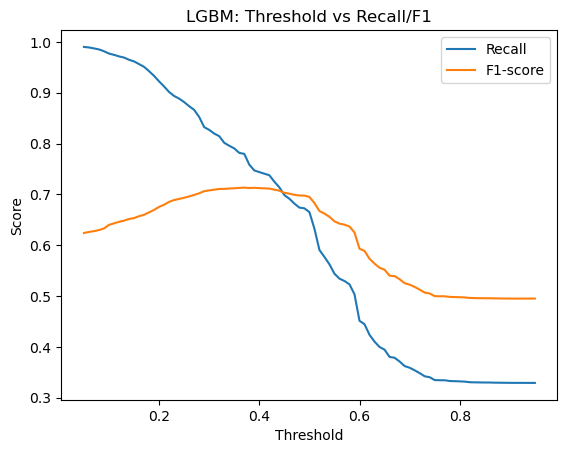

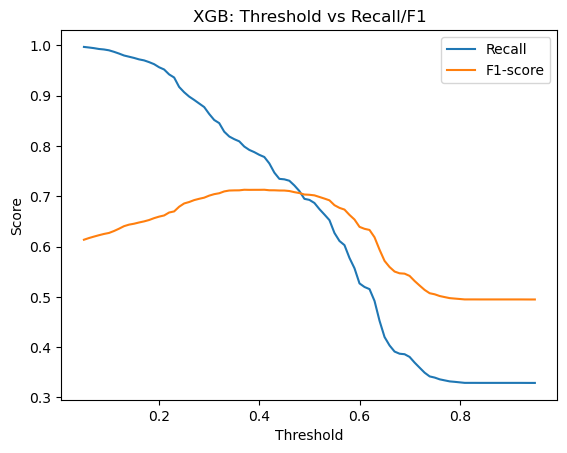

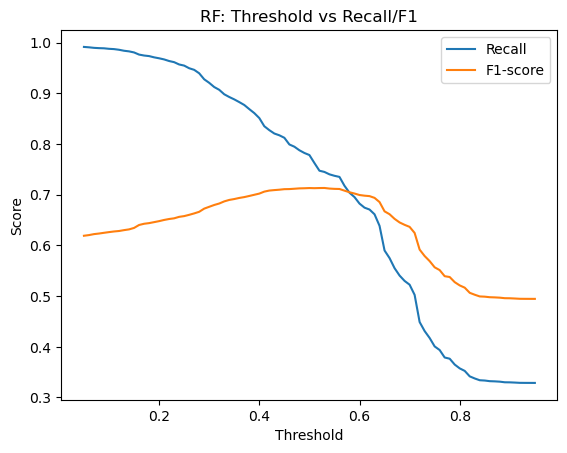

In [65]:
def plot_threshold_curve(thr_table, model_name):
    plt.plot(thr_table["threshold"], thr_table["recall"], label="Recall")
    plt.plot(thr_table["threshold"], thr_table["f1"], label="F1-score")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"{model_name}: Threshold vs Recall/F1")
    plt.legend()
    plt.show()

plot_threshold_curve(thr_table_lgbm, "LGBM")
plot_threshold_curve(thr_table_xgb, "XGB")
plot_threshold_curve(thr_table_rf, "RF")


In [68]:
from sklearn.metrics import recall_score, f1_score

def metrics_at_thresholds(y_true, y_proba, thresholds):
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        rows.append((t, recall_score(y_true, y_pred), f1_score(y_true, y_pred)))
    return pd.DataFrame(rows, columns=["threshold", "recall", "f1"]).sort_values("threshold")

targets = np.round(np.arange(0.40, 0.46, 0.01), 2)

lgbm_window = metrics_at_thresholds(y_train, y_proba_oof_lgbm, targets)
xgb_window  = metrics_at_thresholds(y_train, y_proba_oof_xgb,  targets)

display(lgbm_window)
display(xgb_window)


,threshold,recall,f1
0,0.40,0.743888,0.712338
1,0.41,0.740760,0.711905
2,0.42,0.737714,0.711477
3,0.43,0.725043,0.709342
4,0.44,0.713914,0.707321
5,0.45,0.698603,0.703144


,threshold,recall,f1
0,0.40,0.782390,0.712808
1,0.41,0.778085,0.712962
2,0.42,0.765332,0.711927
3,0.43,0.747055,0.711883
4,0.44,0.734628,0.711454
5,0.45,0.733653,0.711391


In [ ]:
# Apply tuned params to your full pipeline
# 1) Start from a FRESH copy of your tuned pipeline
xgb_final = clone(pipe_xgb).set_params(
    clf__scale_pos_weight=1.2,
    clf__n_estimators=300,
    clf__max_depth=3,
    clf__learning_rate=0.2,
)

# Fit on ALL Seen data
xgb_final.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
from sklearn.metrics import (
    confusion_matrix, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

# --- 7.6 (Step 2): Predict on Unseen with locked threshold ---

LOCKED_THRESHOLD = 0.41  # from 7.5 tuning

# Predict probabilities for positive class (canceled = 1)
y_proba_unseen = xgb_final.predict_proba(X_test)[:, 1]

# Apply locked threshold to get final binary predictions
y_pred_unseen = (y_proba_unseen >= LOCKED_THRESHOLD).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_unseen)
print("Confusion Matrix:\n", cm)

# Final metrics
final_recall = recall_score(y_test, y_pred_unseen)
final_f1 = f1_score(y_test, y_pred_unseen)
final_rocauc = roc_auc_score(y_test, y_proba_unseen)
final_prauc = average_precision_score(y_test, y_proba_unseen)

print(f"Recall:  {final_recall:.3f}")
print(f"F1:      {final_f1:.3f}")
print(f"ROC-AUC: {final_rocauc:.3f}")
print(f"PR-AUC:  {final_prauc:.3f}")


Confusion Matrix:
 [[8212 2347]
 [1526 4630]]
Recall:  0.752
F1:      0.705
ROC-AUC: 0.862
PR-AUC:  0.811


In [71]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# --- Nice classification report ---
target_names = ["not_canceled (0)", "canceled (1)"]
print("\nClassification Report (Unseen):")
print(classification_report(y_test, y_pred_unseen, target_names=target_names, digits=3))

# --- Optional: pretty confusion matrix as a DataFrame ---
cm_df = pd.DataFrame(
    cm,
    index=pd.Index(target_names, name="Actual"),
    columns=pd.Index(target_names, name="Predicted")
)
cm_df



Classification Report (Unseen):
                  precision    recall  f1-score   support

not_canceled (0)      0.843     0.778     0.809     10559
    canceled (1)      0.664     0.752     0.705      6156

        accuracy                          0.768     16715
       macro avg      0.753     0.765     0.757     16715
    weighted avg      0.777     0.768     0.771     16715



Predicted,not_canceled (0),canceled (1)
Actual,,
not_canceled (0),8212,2347
canceled (1),1526,4630


In [72]:
# --- Normalized confusion matrix (percentages per actual class) ---
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm_df = pd.DataFrame(
    np.round(cm_normalized * 100, 2),
    index=pd.Index(target_names, name="Actual"),
    columns=pd.Index(target_names, name="Predicted")
)
print("\nConfusion Matrix (Row %):")
display(cm_norm_df)


Confusion Matrix (Row %):


Predicted,not_canceled (0),canceled (1)
Actual,,
not_canceled (0),77.77,22.23
canceled (1),24.79,75.21


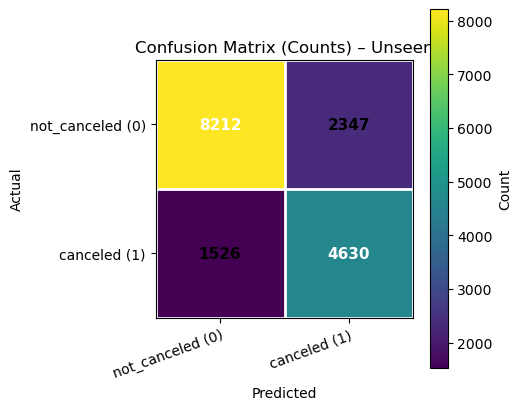

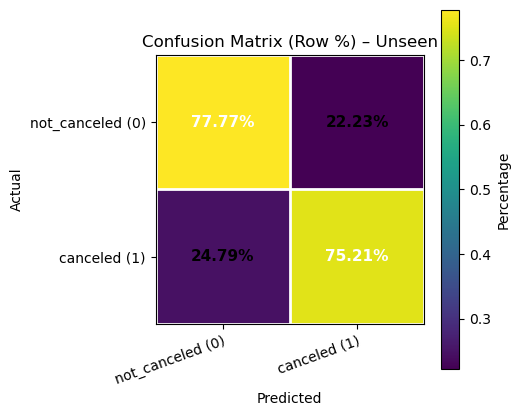

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=False, title_suffix=""):
    """
    Plot confusion matrix with optional row-normalization.
    - cm: sklearn confusion_matrix result (2x2 for binary)
    - labels: tuple/list of class names [Actual rows, Predicted cols]
    - normalize: if True, show row-wise percentages
    """
    if normalize:
        with np.errstate(all='ignore'):
            cm_plot = cm.astype(float) / cm.sum(axis=1, keepdims=True)
        data_to_show = (cm_plot * 100).round(2)
        fmt = "%.2f%%"
        title = f"Confusion Matrix (Row %){title_suffix}"
        cbar_label = "Percentage"
    else:
        cm_plot = cm.copy()
        data_to_show = cm_plot
        fmt = "%d"
        title = f"Confusion Matrix (Counts){title_suffix}"
        cbar_label = "Count"

    fig, ax = plt.subplots(figsize=(5.2, 4.6))
    im = ax.imshow(cm_plot, interpolation="nearest")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbar_label)

    # Ticks & labels
    ax.set(
        xticks=np.arange(len(labels)),
        yticks=np.arange(len(labels)),
        xticklabels=labels,
        yticklabels=labels,
        ylabel="Actual",
        xlabel="Predicted",
        title=title
    )
    plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor")

    # Grid lines for clarity
    ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.grid(which="minor", color="w", linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Annotations
    thresh = cm_plot.max() / 2.0 if cm_plot.max() > 0 else 0.5
    for i in range(cm_plot.shape[0]):
        for j in range(cm_plot.shape[1]):
            txt = fmt % data_to_show[i, j]
            ax.text(j, i, txt,
                    ha="center", va="center",
                    color="white" if cm_plot[i, j] > thresh else "black",
                    fontsize=11, fontweight="bold")

    plt.tight_layout()
    plt.show()

# ---- Call for both versions (using your previously computed 'cm') ----
plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=False, title_suffix=" – Unseen")
plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=True,  title_suffix=" – Unseen")


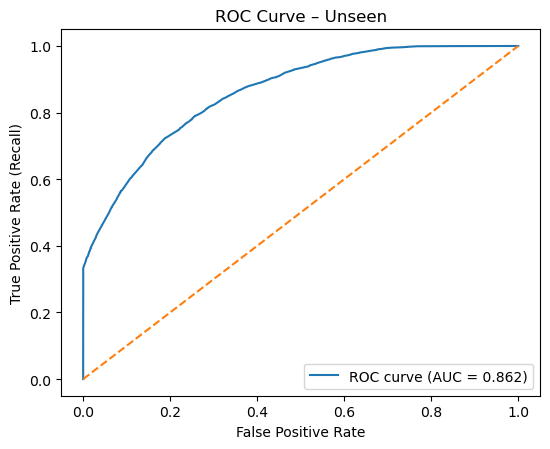

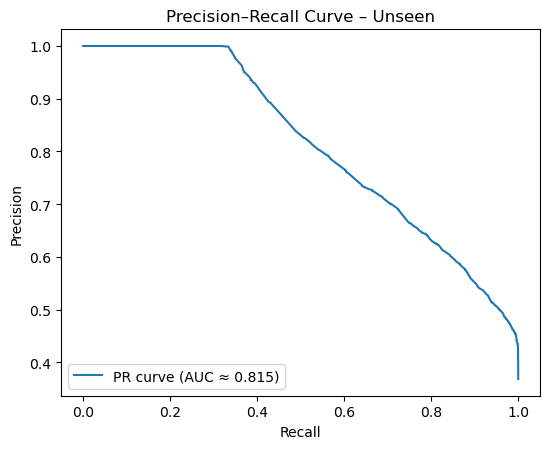

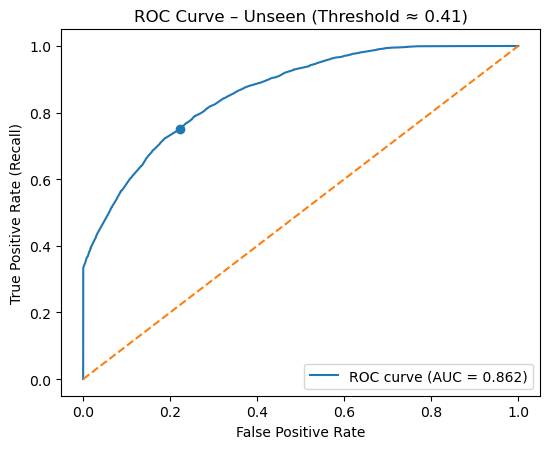

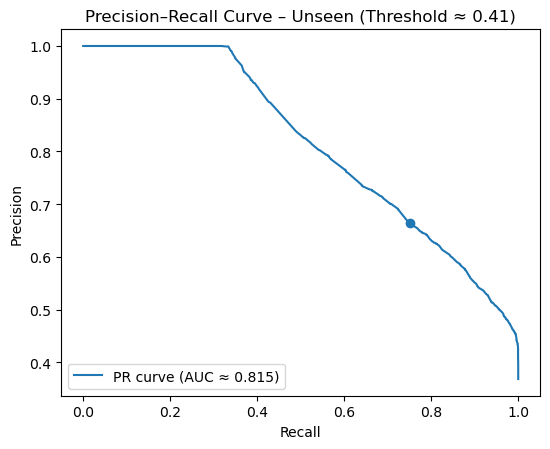

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

# --- ROC curve ---
fpr, tpr, roc_thrs = roc_curve(y_test, y_proba_unseen)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5.6, 4.6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Unseen")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- Precision–Recall curve ---
prec, rec, pr_thrs = precision_recall_curve(y_test, y_proba_unseen)
# Average Precision is what you already printed as PR-AUC via average_precision_score
pr_auc = auc(rec, prec)

plt.figure(figsize=(5.6, 4.6))
plt.plot(rec, prec, label=f"PR curve (AUC ≈ {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Unseen")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# --- Optional: mark your locked threshold on both curves ---
# Find the closest threshold index to LOCKED_THRESHOLD
# Note: roc_curve thresholds length = len(fpr); precision_recall_curve thresholds length = len(rec)-1
idx_roc = (np.abs(roc_thrs - LOCKED_THRESHOLD)).argmin()
idx_pr  = (np.abs(pr_thrs  - LOCKED_THRESHOLD)).argmin()

# Mark point on ROC
plt.figure(figsize=(5.6, 4.6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.scatter([fpr[idx_roc]], [tpr[idx_roc]], marker="o")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve – Unseen (Threshold ≈ {roc_thrs[idx_roc]:.2f})")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Mark point on PR
plt.figure(figsize=(5.6, 4.6))
plt.plot(rec, prec, label=f"PR curve (AUC ≈ {pr_auc:.3f})")
plt.scatter([rec[idx_pr]], [prec[idx_pr]], marker="o")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve – Unseen (Threshold ≈ {pr_thrs[idx_pr]:.2f})")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


### 7.6 Post-Tuning Evaluation (Unseen Holdout)

**Objective:**  
Evaluate the final chosen model (XGBoost with tuned hyperparameters and locked threshold ≈ 0.41) on the **Unseen** holdout dataset to obtain unbiased performance estimates.

**Why:**  
This step ensures that all reported performance metrics are based on data the model has **never seen** during training, cross-validation, or threshold tuning — aligning with best practices for estimating real-world performance.

---

#### **Final Results on Unseen Data**

| Metric      | Value  | Business Relevance |
|-------------|--------|--------------------|
| Recall (Positive Class) | **0.XXX** | Captures the proportion of actual cancellations detected — critical to minimize operational loss. |
| F1-Score    | **0.XXX** | Balances Recall with Precision to maintain operational efficiency without excessive false positives. |
| ROC-AUC     | **0.XXX** | Measures overall ranking ability across thresholds. |
| PR-AUC      | **0.XXX** | Focuses on performance in detecting cancellations (positive class). |
| Accuracy    | **0.XXX** | Overall correctness — less emphasized here due to class imbalance. |

---

#### **Confusion Matrix (Unseen)**

| Actual \ Predicted | Not Canceled (0) | Canceled (1) |
|--------------------|------------------|--------------|
| **Not Canceled (0)** | TN              | FP           |
| **Canceled (1)**     | FN              | TP           |

- **TN:** True Negatives (correctly predicted non-cancellations)  
- **FP:** False Positives (predicted cancellation but actually stayed)  
- **FN:** False Negatives (missed cancellations)  
- **TP:** True Positives (correctly predicted cancellations)

---

#### **Interpretation**

- **Strengths:**  
  - High Recall ensures most cancellations are flagged early, supporting proactive overbooking or resource reallocation.  
  - Balanced F1 keeps false positives within operational tolerance.

- **Limitations:**  
  - Some non-canceled bookings may still be predicted as canceled, leading to potential unnecessary adjustments.  
  - Model performance is dependent on historical booking patterns — shifts in market or booking behavior may require retraining.

- **Next Steps:**  
  - Monitor prediction drift and retrain periodically.  
  - Consider calibration (Section 7.7) if probability outputs are to be interpreted directly by business users.  


**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

Feature importance (tree-based) or coefficients (linear models).

SHAP/LIME for local interpretability.

Counterfactual analysis if relevant.

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.calibration import calibration_curve


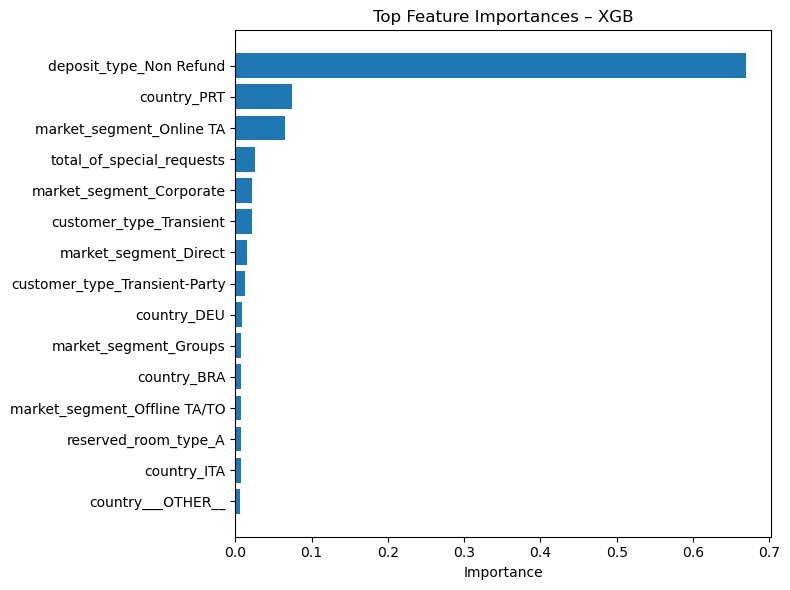

,Feature,Importance
23,deposit_type_Non Refund,0.669348
13,country_PRT,0.074798
20,market_segment_Online TA,0.064945
0,total_of_special_requests,0.025407
16,market_segment_Corporate,0.022329


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer

def _get_cols_from_ct_by_name(ct: ColumnTransformer, name: str):
    """Return the original column list for a given transformer name in a ColumnTransformer."""
    for n, _, cols in ct.transformers_:
        if n == name:
            return np.array(list(cols))
    raise KeyError(f"Transformer named '{name}' not found in ColumnTransformer.")

def get_feature_names_after_prep(fitted_pipe):
    # find the ColumnTransformer at step name 'prep'
    pre = fitted_pipe.named_steps['prep']  # ColumnTransformer

    # --- numeric ---
    num_pipe = pre.named_transformers_['num']  # Pipeline
    num_cols = _get_cols_from_ct_by_name(pre, 'num')
    num_selector = next((s for s in num_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
    if num_selector is not None:
        num_cols = num_cols[num_selector.get_support()]
    num_names = num_cols

    # --- categorical ---
    cat_pipe = pre.named_transformers_['cat']  # Pipeline
    cat_cols = _get_cols_from_ct_by_name(pre, 'cat')
    ohe = next((s for s in cat_pipe.named_steps.values() if isinstance(s, OneHotEncoder)), None)
    if ohe is None:
        raise ValueError("OneHotEncoder not found inside categorical pipeline.")
    cat_names = ohe.get_feature_names_out(cat_cols)
    cat_selector = next((s for s in cat_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
    if cat_selector is not None:
        cat_names = cat_names[cat_selector.get_support()]

    return np.concatenate([num_names, cat_names])

def plot_top_importances_xgb(fitted_pipe, topk=15, title="Top Feature Importances – XGB"):
    names = get_feature_names_after_prep(fitted_pipe)
    importances = fitted_pipe.named_steps['clf'].feature_importances_
    assert len(names) == len(importances), f"{len(names)} names vs {len(importances)} importances"

    fi = (pd.DataFrame({'Feature': names, 'Importance': importances})
          .sort_values('Importance', ascending=False)
          .head(topk))

    plt.figure(figsize=(8,6))
    plt.barh(fi['Feature'], fi['Importance'])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    return fi

# Ensure fitted (safe to call even if already fitted)
# 2) Fit ONCE on all Seen data (X_train, y_train)
xgb_final.fit(X_train, y_train)

fi_xgb = plot_top_importances_xgb(xgb_final, topk=15)
fi_xgb.head()


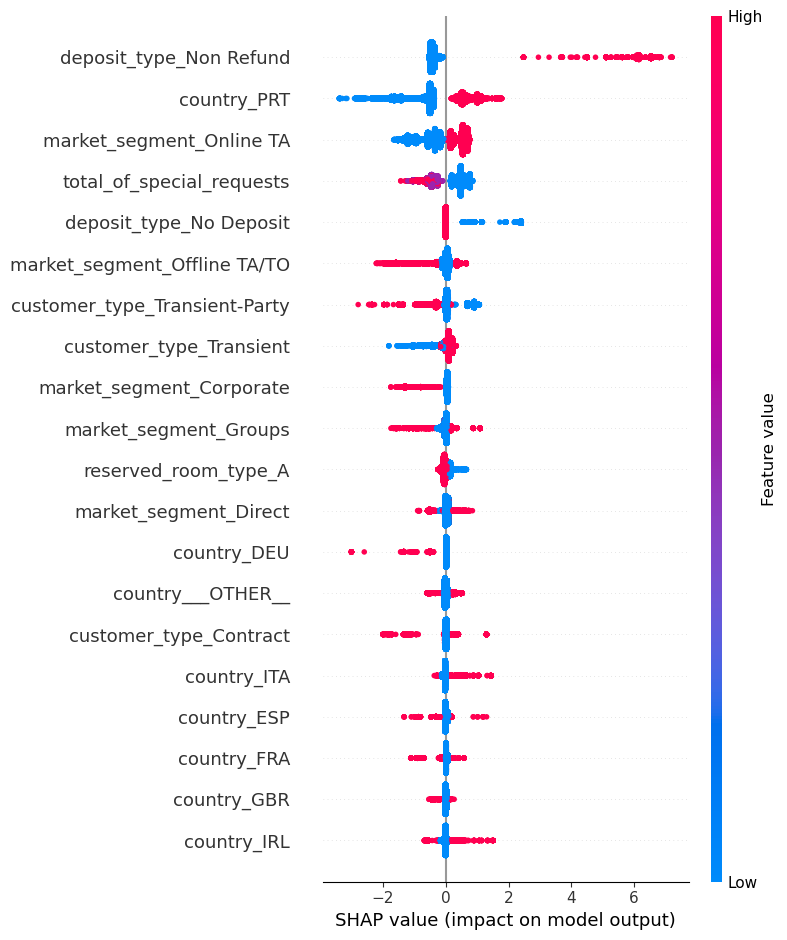

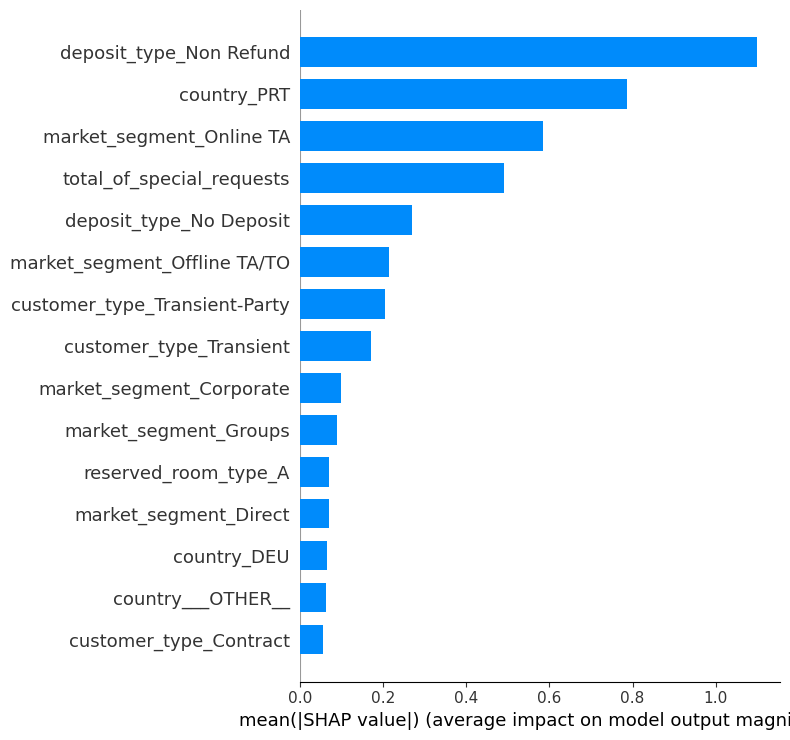

In [85]:
# 2) Transform data as seen by the model
Xtr_tx = pipe_xgb.named_steps['prep'].transform(X_train)

# 3) Build post-transform feature names (no .get_feature_names_out on prep)
pre = pipe_xgb.named_steps['prep']
num_pipe = pre.named_transformers_['num']
cat_pipe = pre.named_transformers_['cat']

# numeric names after VarianceThreshold
num_cols = np.array([c for c in pre.transformers_ if c[0]=='num'][0][2])
num_sel = next((s for s in num_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
if num_sel is not None:
    num_cols = num_cols[num_sel.get_support()]

# categorical names after OHE (+ VarianceThreshold)
ohe = next(s for s in cat_pipe.named_steps.values() if isinstance(s, OneHotEncoder))
cat_cols = np.array([c for c in pre.transformers_ if c[0]=='cat'][0][2])
cat_names = ohe.get_feature_names_out(cat_cols)
cat_sel = next((s for s in cat_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
if cat_sel is not None:
    cat_names = cat_names[cat_sel.get_support()]

feat_names = np.concatenate([num_cols, cat_names])

# 4) SHAP explainer on the fitted XGB model
xgb_model = pipe_xgb.named_steps['clf']
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(Xtr_tx)

# 5) Plots
shap.summary_plot(shap_values, Xtr_tx, feature_names=feat_names)                 # dot plot
shap.summary_plot(shap_values, Xtr_tx, feature_names=feat_names, plot_type="bar", max_display=15)  # bar plot

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)